# Introduction to Python & Numpy (move to Prac 0.a)
Fork this and build on it: 

https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

# Machine Learning Fundamentals (move to Prac 0.b)

In this section we will quickly review the fundamentals of Machine Learning. Machine learning can be defined as:

>*the process whereby a **model** improves its performance with respect to some **task**, as measured in terms of some performance measure or **objective function**, by learning from examples from some **data** or training set.*

In order to talk about Machine Learning, we will therefore talk about all of these ideas in turn.

##Data

what do we mean when we talk about the **structure** of datasets?


##Hypothesis functions or "models"
How do they work, the assumptions that models necessarily have to make about the data in order to be useful (no free lunch), and again, what do we mean when we talk about the "structure" of models.

##Parametric vs non-parametric learning

What do parameters do/represent? Decision boundaries, weight vectors, etc.


##Objective/loss functions

Empasize that this is a scalar goodness-of-fit function of the input data, parameterized using the model parameters.

##Learning as Optimization

Optimizing a cost function moves around in parameter/weight space, and each position is quantified by its scalar loss value. 


##Empirical Risk Minimization
Overfitting & the need for training/validation/test splits. What we care about is performance on held-out data.


#Building Intuitions: Our First Classifier on Simple Toy Data

Run the code in the cell below, and look at the resulting plot. It should produce a simple 2D data set consisting of 2 classes of points, a weight vector in black, and a decision boundary in red. The goal is to obtain a decision boundary that best separates the different classes of points.

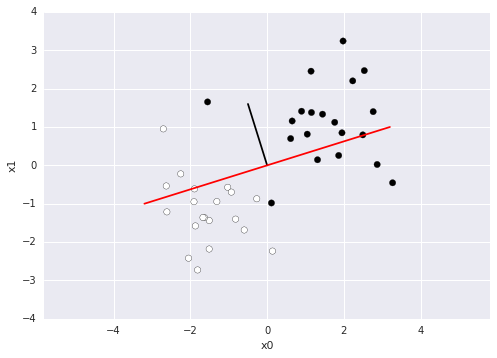

In [2]:
import numpy as np               # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt  # Matplotlib is used to generate plots of data.

centre = 1.0
points_in_class = 20
np.random.seed(0)

# Generate data.
x_pos = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])
x_neg = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2])
x = np.concatenate((x_pos, x_neg), axis=0)
  
y_pos = np.ones(points_in_class)
y_neg = - np.ones(points_in_class)
y = np.concatenate((y_pos, y_neg), axis=0)

# N is the data set size
N = 2 * points_in_class

# Plot the data
fig = plt.figure()  
plt.scatter(x[:, 0], x[:, 1], c=y, s=40)
plt.axis('equal')

# Pick a weight vector. In the exercise below, you are going to change the
# values in this weight vector to see how the decision boundary changes.
w = [-0.5, 1.6]

# Add the weight vector to the plot.
plt.plot([0, w[0]], [0, w[1]], 'k-')

# Plot part of the decision boundary. It is orthogonal to the weight vector.
t = 2
plt.plot([-t * w[1], t * w[1]], [t * w[0], -t * w[0]], 'r-')

plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# What do parameters do?

* Change w = [0.5, 1.6] to different values, and re-run the above code.

* How does the decision boundary change?

* Where in x-space is the inner product w' * x positive? Negative? Zero? Can you relate that to the class labels y?

* By changing w, can you manually find a weight vector that does a good job of discriminating between the two classes?
  * How did you manually find it? What made you move from one choice to the next?

* Now that you've found it manually, chat with your friend next to you.
  * How will you find it automatically?
  * Can you devise a function, where minimizing it does the same thing as the way you manually searched?
  * Pause here and think.
    * Which values of w give "bad solutions", according to you?
    * Which ones give good solutions?

* Try to draw the function that you devised on a piece of paper. It should be small when w gives a "good solution", and it should be big when w gives a "bad solution". Be creative and think of your own function. Show your drawing it to your neighbour.

DO NOT PROCEED ANY FURTHER UNTIL YOU'VE THOROUGHLY ATTEMPTED ALL THE ABOVE QUESTIONS. (Ask your tutors for help if you're stuck!)

# A loss function of w

* Below we will formulate it as a loss function.

* Run the code below, and look at the plot of the loss function. Note that it is not in x-space any more, but that our axis labels are w[0] and w[1]!

* Do the weights w that you found manually correspond to the minimum of the loss function?


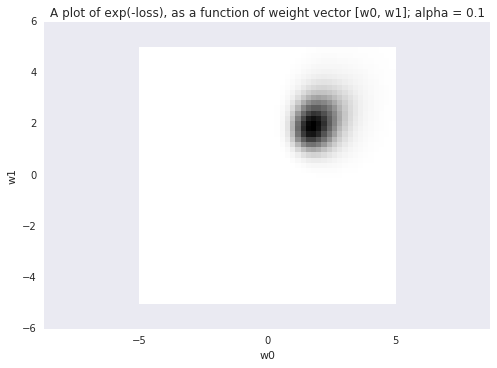

In [5]:
def compute_loss(w0, w1, x, y, alpha):
  # We start with a regularizer.
  # What is its effects on the loss function? Does it change the loss function's
  # minimum?
  loss = alpha * (w0 * w0 + w1 * w1)
  
  # Add the data point's contribution to the loss. We do this for every data
  # point. (We don't have to do it in a for-loop, but below, you can really see
  # what is happening...)
  for n in xrange(N):
    # Get the inner product x' * w for data point x.
    inner = w0 * x[n, 0] + w1 * x[n, 1]
    
    # Now look at the plot with a weight vector in our "data space".
    loss += np.log(1 + np.exp(- y[n] * inner))
  
  return loss
  
lim = 5
ind = np.linspace(-lim, lim, 50)
w0, w1 = np.meshgrid(ind, ind)

# You will change the value of alpha (below), to see how the loss function
# changes. It has to be alpha >= 0. No negative values (otherwise the loss
# function's minimum is at negative infinity)!
alpha = 0.1
loss = compute_loss(w0, w1, x, y, alpha)

fig = plt.figure()
plt.pcolor(w0, w1, np.exp(-loss))
# We plot exp(-1oss) here, to let the colours show clearly in the plot. This is
# incidentally also proportional to the joint distribution
# p(y, w | x) = p(y | x, w) p(w), which you'll encounter on Wednesday in the
# Indaba, and can safely ignore for now.
plt.title('A plot of exp(-loss), as a function of weight vector [w0, w1]; '
          + 'alpha = ' + str(alpha))
plt.xlabel('w0')
plt.ylabel('w1')
plt.axis('equal')
plt.show()

# Trying different loss functions

* As a first exercise, look at the function that computes the loss. There is a for-loop, essentially a sum.
  * Can you write down the loss function on a piece of paper? As a mathematical expression...
  
* On a piece of paper, can you draw
        log(1 + exp(- y[n] * inner))
  as a function of the inner product, the value of y, etc.
  * When is it almost zero, and the contribution to the loss is neglible?
  * Where does it become almost linear?
    
    After you've done your drawings, explain to yourself why the function is equivalent to
        inner = y[n] * (w0 * x[n, 0] + w1 * x[n, 1])   
        l += np.log(1 + np.exp(- inner))
    What is the effect of the class label y on the weight vector. What happens if we multiply a weight vector with -1?

* Now change the setting of alpha. Make it bigger, and smaller. What happens to the minimum?

**TODO(sgouws)**: Cut here and move to Prac 0.b


#Working with More Complex Data

Real-world data is unfortunately not as simple as our toy bimodal Gaussian example above. Real data (e.g. pixels from vision, or speech phonemes, or words of a language) can have very complex, high-dimensional distributions. Before we get our hands dirty with that, we'll move one step up and work with another toy dataset, but this time non-linear.

In [0]:
import numpy as np  # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt  # Matplotlib is used to generate plots of data.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# (if you're curious, see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

Let's generate a dataset with three spirals arranged in a swiss-roll type structure, and where each spiral forms a "class" that we want to be able to classify (i.e. the classes are very non-linearly distributed).

##Hyperparameters

First we define some hyperparameters that will be used by the next few cells. Try changing these values to see how to models work with different data. 

In [0]:
num_classes = 3  # The number of classes (distinct groups) of data (these are our "y" values)
dimensions = 2  # The number of dimensions of our X values
points_per_class = 100  # number of X points to generate for each of the y values

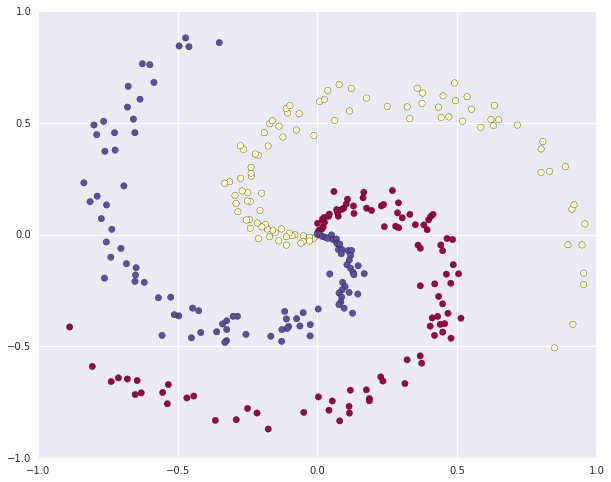

In [3]:
# Setting a random seed allows us to get the exact same data each time we run 
# the cell.
np.random.seed(0)  

def generate_spiral_data(num_classes, dimensions, points_per_class):
  """Generate `num_classes` spirals with `points_per_class` points per spiral."""
  
  X = np.zeros((points_per_class*num_classes, dimensions), dtype='float32')  # Create an empty matrix to hold our X values
  y = np.zeros(points_per_class*num_classes, dtype='uint8')  # Create an empty vector to hold our y values

  for y_value in xrange(num_classes):   # Generate data for each class
    ix = range(points_per_class*y_value, points_per_class*(y_value+1))  # The indices in X and y where we will save this class of data

    radius = np.linspace(0.0, 1, points_per_class)  # Generate evenly spaced numbers in the interval 0 to 1
    theta = np.linspace(y_value*4, (y_value+1)*4, points_per_class) + np.random.randn(points_per_class) * 0.2  

    X[ix] = np.column_stack([radius*np.sin(theta), radius*np.cos(theta)])   # Convert polar coordinates to standard Euclidian coordinates
    y[ix] = y_value
  
  return X, y
  
  
def plot_data(X, y):
  """Use Matplotlib to plot X, y data on a figure."""
  fig = plt.figure()
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim([-1,1])
  plt.ylim([-1,1])
  return fig

X, y = generate_spiral_data(num_classes, dimensions, points_per_class)
fig = plot_data(X, y)

# fig.savefig('spiral_raw.png')  # Uncomment this line if you want to save your image to a file

#Implementing a Classifier from Scratch
We start by implementing first a simple linear classifier and then a more complex nonlinear classifier from scratch in raw Numpy. The reason we do this is to be able to go through all the low-level details of how to make predictions and how to train our models, as these details are very important. 

In the following section, we will then reimplement these two classifiers using TensorFlow, and hopefully we will see that this makes things much easier (especially as the models get more complex!).

##Implementing a Linear Classifier

**TODO**: Add description (math + flow-graph). Break up the code below and discuss each section in more detail.

How do we define and train a model that learns to separate the num_classes different classes, based on their coordinates in X space?

Let's start with a simple linear model and see how far we can get. 

**TODO(avishkar)**: Should we explain what is meant by "linear model" a bit more here (ie linear function of the parameters), or leave that for the intro to ML section?

Lets begin by defining some re-usable helper functions. You may want to look ahead to the LinearModel before implementing these to see how they get used. 

In [0]:
def softmax(logits):
  """Convert un-normalised model scores(logits) into a probability distribution.

  Args:
    logits: The un-normalised scores assigned by the model.
  """
  exp_logits = np.exp(logits)
  probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
  return probs

def cross_entropy(predictions, targets):
  """Calculate the cross entropy loss given some predictions and target (true) values.

  Args:
    predictions: The model predictions (of shape [num_examples, num_classes])
    targets: The correct labels for the data (of shape [num_examples])
  """
  num_examples = predictions.shape[0]
  correct_logprobs = -np.log(predictions[range(num_examples), targets])
  crossentropy = np.sum(correct_logprobs) / num_examples
  return crossentropy

def l2_loss(parameters):
  """Calculate the L2 regularisation of a list of parameters."""
  reg = 0.0
  for param in parameters:
    reg += 0.5 * reg_lambda * np.sum(param * param)
  return reg

In [5]:
### HYPERPARAMETERS

learning_rate = 1e-0  # How far along the gradient do we want to travel when doing 
                      # gradient descent?
reg_lambda = 1e-3  # Regularization strength

####

# Define the initial random value of W here so we can re-use it later.
W_init = 0.01 * np.random.randn(dimensions, num_classes)

class LinearModel(object):
  def __init__(self):
    # Initialize the model parameters.
    self.W = np.copy(W_init)
    self.b = np.zeros((1, num_classes))
  
  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    num_examples = probs.shape[0]
    data_loss = cross_entropy(probs, y)
    regulariser = l2_loss([self.W])
    return data_loss + regulariser
  
  def update(self, probs, X, y):  
    """Update the model parameters using back-propagation and gradient descent."""
    # Calculate the gradient of the loss with respect to logits
    dlogits = self.derivative_loss_logits(probs, y)  
    
    # Gradient of the loss wrt W
    dW = self.derivative_loss_W(X, dlogits)
    
    # Gradient of the loss wrt b
    db = self.derivative_loss_b(dlogits)
    
    # Don't forget the gradient on the regularization term.
    dW += self.derivative_regularisation()
    
    # Perform a parameter update.
    self.W += -learning_rate * dW
    self.b += -learning_rate * db
    
  
  ##### Now we define some helper functions   
  # (This is probably where students will have to add lines of code)
  def get_logits(self, X):
    """Calculate the un-normalised model scores.

    Args:
      X: The input values.
    """
    return np.dot(X, self.W) + self.b 

  def derivative_loss_logits(self, logits, y):
    """Calculate the derivative of the loss with respect to logits."""
    num_examples = y.shape[0]
    dlogits = logits
    dlogits[range(num_examples),y] -= 1
    dlogits /= num_examples
    return dlogits
  
  def derivative_loss_W(self, X, dlogits):
    """Calculate the derivative of the loss wrt W."""
    return np.dot(X.T, dlogits)
  
  def derivative_loss_b(self, dlogits):
    """Calculate the derivative of the loss wrt b."""
    return np.sum(dlogits, axis=0, keepdims=True)
  
  def derivative_regularisation(self):
    return reg_lambda * self.W 


# Create an instance of our LinearModel
linear_model = LinearModel()

# Now we train the linear model
for i in xrange(200):
  
  # Get the model predictions for our spiral dataset X
  probs = linear_model.predictions(X)
  
  # Compute the loss
  loss = linear_model.loss(probs, y)
  
  # Print the loss value every 10 steps.
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # Use back-propagation to update the model parameters:
  linear_model.update(probs, X, y)
  

iteration 0: loss 1.096919
iteration 10: loss 0.917310
iteration 20: loss 0.851535
iteration 30: loss 0.822352
iteration 40: loss 0.807594
iteration 50: loss 0.799452
iteration 60: loss 0.794683
iteration 70: loss 0.791765
iteration 80: loss 0.789921
iteration 90: loss 0.788726
iteration 100: loss 0.787937
iteration 110: loss 0.787408
iteration 120: loss 0.787049
iteration 130: loss 0.786803
iteration 140: loss 0.786633
iteration 150: loss 0.786514
iteration 160: loss 0.786431
iteration 170: loss 0.786373
iteration 180: loss 0.786331
iteration 190: loss 0.786302


Compute accuracy on the training set.

In [6]:
# Get the probabilites/scores that the model assigns to each class for each X datapoint.
scores = linear_model.get_logits(X)  # The shape of scores is [num_data_points, num_classes]

# The index of the maximum score along the 2nd dimension is the class that the model thinks is most likely (y^) for each datapoint.
predicted_class = np.argmax(scores, axis=1)

# What proportion of the class predictions made by the model (y^) agree with the true class values (y) ?
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.49


This is not a very good result (we are misclassifying around 50% of the data points...), lets visualise the decision boundary to determine what's going on.

##Visualizing the Linear Model's Decision Boundary

Let's visualize the decision boundary of this linear classifier on the swiss roll dataset.


In [0]:
def plot_decision_boundary(X, get_logits_fn):
  """Overlays the classifier's decision boundary on the dataset [X, y].
  
  Args:
    X: 2-d matrix input data,
    get_logits_fn: classifier function that maps points in X to predicted logits (logits are un-normalised scores).
  """
  
  step_size = 0.02  # Discretization step-size
  
  # Get the boundaries of the dataset.
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Generate a grid of points, step_size apart, over the above region.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                       np.arange(y_min, y_max, step_size))
  
  # Flatten the data and get the logits of the classifier (the "scores") for 
  #   each point in the generated mesh-grid.
  meshgrid_matrix = np.c_[xx.ravel(), yy.ravel()]
  Z = get_logits_fn(meshgrid_matrix)
  
  # Get the class predictions for each point.
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  
  # Overlay both of these on one figure.
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  #fig.savefig('spiral_linear.png')

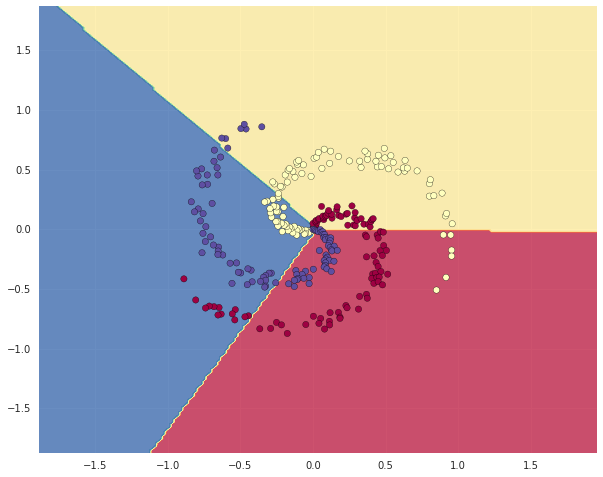

In [8]:
plot_decision_boundary(X, linear_model.get_logits)

**TODO(avishkar)**: Add discussion/interpretation of this decision boundary. IDEA: Maybe we add open-ended questions instead? Ie here we could just say "What does this decision boundary tell you about the model? What ideas do you have that could improve the models' accuracy?"

##Using a nonlinear model

**TODO**: Include motivation.

The linear model resulted in 3 decision boundaries that were straight lines in 2D space. Using these 3 lines, it is impossible to accurately separate our spiral-shaped data. Let's see how converting our model to be a non-linear function of its parameters could resolve this. 

In [166]:
### HYPERPARAMETERS

learning_rate = 1e-0  # How far along the gradient do we want to travel when doing 
                      # gradient descent?
reg_lambda = 1e-3  # Regularization strength
num_hidden = 100  # Size of hidden layer.
####

non_linear_W_init = 0.01 * np.random.randn(dimensions, num_hidden)
non_linear_W2_init = 0.01 * np.random.randn(num_hidden, num_classes)

# We need an additional helper function for the non-linear model

def relu(value):
  """ ReLU is the "Rectified Linear Unit activation function", defined as:
        relu(x) = x if x > 0, and 0 if x <= 0
  """
  return np.maximum(0, value)  

class NonLinearModel(object):
  def __init__(self):
    # Initialize the model parameters.
    self.W = non_linear_W_init
    self.b = np.zeros((1, num_hidden))
    self.W2 = non_linear_W2_init
    self.b2 = np.zeros((1, num_classes))

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy(probs, y)
    regulariser = l2_loss([self.W, self.W2])
    return data_loss + regulariser
  
  def update(self, probs, X, y):  
    """Update the model parameters using back-propagation and gradient descent."""
    hidden_output = self.hidden_layer(X)
    
    # Calculate the gradient of the loss with respect to logits
    dlogits = self.derivative_loss_logits(probs, y)  
    
    # Backpropate the gradient to the parameters.
    
    # We first backprop into parameters W2 and b2.
    dW2 = self.derivative_loss_W2(hidden_output, dlogits)
    db2 = self.derivative_loss_b2(dlogits)

    # Next, backprop into the hidden layer.
    dhidden = self.derivative_hidden(hidden_output, dlogits)

    # Finally, backprop into W,b.
    dW = self.derivative_loss_W(X, dhidden)
    db = self.derivative_loss_b(dhidden)

    # Add regularization gradient contribution.
    dW2 += self.derivative_regularisation_W2()
    dW += self.derivative_regularisation_W()

    # Perform a parameter update (one step of gradient descent).
    self.W += -learning_rate * dW
    self.b += -learning_rate * db
    self.W2 += -learning_rate * dW2
    self.b2 += -learning_rate * db2
    

  ## DEFINE THE MODEL HELPER FUNCTIONS  
  
  def hidden_layer(self, X):
    """Calculate the output of the hidden layer."""
    return relu(np.dot(X, self.W) + self.b)
    
  def get_logits(self, X):
    """Calculate the logits from the input data X."""
    hidden_output = self.hidden_layer(X)
    logits = np.dot(hidden_output, self.W2) + self.b2
    return logits
  
  def derivative_loss_logits(self, logits, y):
    """Calculate the derivative of the loss with respect to logits."""
    num_examples = y.shape[0]
    dlogits = logits
    dlogits[range(num_examples),y] -= 1
    dlogits /= num_examples
    return dlogits
  
  def derivative_loss_W2(self, hidden_output, dlogits):
    """Calculate the derivative of the loss wrt W2."""
    dW2 = np.dot(hidden_output.T, dlogits)
    return dW2
  
  def derivative_loss_b2(self, dlogits):
    """Calculate the derivative of the loss wrt b2."""
    return np.sum(dlogits, axis=0, keepdims=True)
    
  def derivative_hidden(self, hidden_output, dlogits):
    """Calculate the derivative of the loss wrt the hidden layer."""
    # Calculate the gradient as if the hidden layer were a normal linear layer. 
    dhidden = np.dot(dlogits, self.W2.T)
    
    # Now take the Relu non-linearity into account
    dhidden[hidden_output <= 0] = 0
    
    return dhidden
    
  def derivative_loss_W(self, X, dhidden):
    """Calculate the derivative of the loss wrt W."""
    return np.dot(X.T, dhidden)
  
  def derivative_loss_b(self, dhidden):
    """Calculate the derivative of the loss wrt b."""
    return np.sum(dhidden, axis=0, keepdims=True)
  
  def derivative_regularisation_W(self):
    """Calculate the gradient of the L2 loss wrt W."""
    return reg_lambda * self.W 
  
  def derivative_regularisation_W2(self):
    """Calculate the gradient of the L2 loss wrt W2."""
    return reg_lambda * self.W2
  

# Create an instance of our non-linear model.
non_linear_model = NonLinearModel()

# Now lets train the model
for i in xrange(10000):
  
  # Get the model predictions for our spiral dataset X
  probs = non_linear_model.predictions(X)
  
  # Compute the loss
  loss = non_linear_model.loss(probs, y)
  
  # Print the loss value every 1000 steps.
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # Use back-propagation to update the model parameters:
  non_linear_model.update(probs, X, y)

iteration 0: loss 1.098676
iteration 1000: loss 0.310453
iteration 2000: loss 0.259407
iteration 3000: loss 0.247993
iteration 4000: loss 0.244694
iteration 5000: loss 0.244273
iteration 6000: loss 0.244150
iteration 7000: loss 0.244115
iteration 8000: loss 0.244085
iteration 9000: loss 0.244064


In [13]:
# evaluate training set accuracy
scores = non_linear_model.get_logits(X)
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.98


Much better! Is it possible to get to 100%? What factors about the dataset would influence this?

##Visualize the Nonlinear Model's Decision Boundary

**TODO** Re-use the function above.

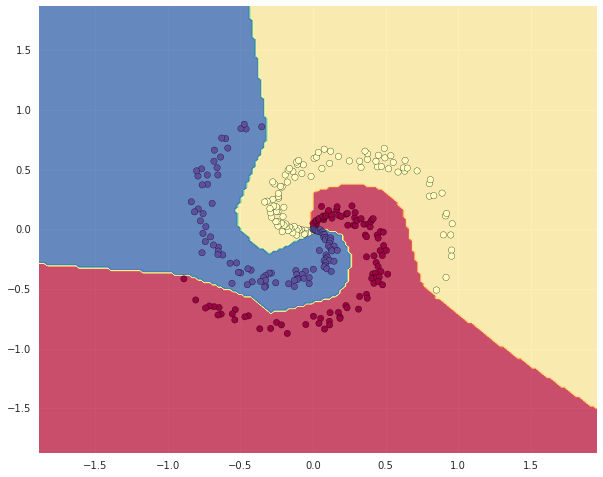

In [14]:
plot_decision_boundary(X, non_linear_model.get_logits)

#Using TensorFlow

Now let's reimplement the above using TensorFlow.

In [0]:
# First we need to import TensorFlow.
import tensorflow as tf

tf.reset_default_graph()

### HYPERPARAMETERS
learning_rate = 1e-0
reg_lambda = 1e-3
training_iterations = 200  # 'epochs'
batch_size = X.shape[0]  # The whole dataset; i.e. batch gradient descent.
display_step = 10  # How often should we print our results
###

# Network Parameters
num_input = 2 # 2-dimensional input data
num_classes = 3 # red, yellow and blue!
# TODO(avishkar): Just re-use the values defined previously?

# placeholders for the inputs and labels. We will 'feed' these to the graph.
x_tf = tf.placeholder(tf.float32, [None, num_input])
y_tf = tf.placeholder(tf.int32, [None])

Lets create some common functions that we can re-use in the Tensorflow models. We need fewer than the previous models because Tensorflow already provides a number of useful functions out the box! 

In [0]:
def cross_entropy_tf(predictions, targets):
  """Calculate the cross entropy loss given some model predictions and target (true) values."""
  targets = tf.one_hot(targets, num_classes)
  return tf.reduce_mean(-tf.reduce_sum(targets * tf.log(predictions), axis=1))

##Linear Model

We construct a linear model with the same architecture as above. Notice how TensorFlow provides out-the-box many of the functions we had to previously define ourselves. There is another major difference between the TensorFlow code and Numpy code that may not be immediately apparant. In TensorFlow, when we call functions like tf.nn.softmax() we are not performing a computation, rather we are defining an operation in a calculation graph that gets run later. 

In [0]:
class TFLinearModel(object):
  def __init__(self):
    # Initialise the variables
    # Tensorflow variables can be updated automatically by optimisers.
    self.W = tf.Variable(W_init, dtype=tf.float32)
    self.b = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = tf.nn.softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy_tf(probs, y)
    regulariser = reg_lambda * tf.nn.l2_loss(self.W)
    return data_loss + regulariser
    
  def get_logits(self, X):
    return tf.add(tf.matmul(X, self.W), self.b)

Now that we have the cost, we're ready to derive the gradients of the cost w.r.t. the model parameters, and use this to take a step in the negative direction of the gradient (i.e. take one step in parameter space that will reduce the scalar value of cost).

We can do all of this with the following line in TF:

In [0]:
tf_linear_model = TFLinearModel()
probs = tf_linear_model.predictions(x_tf)
loss = tf_linear_model.loss(probs, y_tf)

# Compute the gradient on scores and perform one parameter update (take one 'step')
optimizer_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

**TODO(sgouws)**: Discuss that this op wraps computation of grandients (backprop) as well as updating of parameters (optimization).

Remember, up until now we've been defining a calculation graph. Now we can run this graph multiple times, feeding in our data, in a training loop.

In [175]:
# Get the op which, when executed, will initialize the variables.
def train_loop(optimizer_step, loss, training_iterations, display_step):
  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    # Actually initialize the variables (run the op).
    sess.run(init)

    # Training cycle.
    for iteration in range(training_iterations):
        avg_cost = 0.
        total_batch = int(X.shape[0] / batch_size)

        # Loop over all batches.
        for i in range(total_batch):

            batch_x = X[i * batch_size : (i + 1) * batch_size, :]
            batch_y = y[i * batch_size : (i + 1) * batch_size]

            # Run optimization op (backprop) and cost op (to get loss value).
            _, c = sess.run([optimizer_step, loss], feed_dict={x_tf: batch_x,
                                                               y_tf: batch_y})
            # Compute average loss.
            avg_cost += c / total_batch

        # Display logs per iteration/epoch step.
        if iteration % display_step == 0:
            print "Iteration:", '%04d' % (iteration + 1), "cost=", \
                "{:.9f}".format(avg_cost)

    print "Optimization Finished!"
  
train_loop(optimizer_step, loss, 200, 10)

# Test model
# TODO: Hold out and calculate accuracy on actual held-out data
#correct_prediction = tf.equal(tf.argmax(probs, 1), y_tf)
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
#print "Accuracy:", accuracy.eval({x_tf: X, y_tf: y})


Iteration: 0001 cost= 1.099479556
Iteration: 0011 cost= 0.918023527
Iteration: 0021 cost= 0.851802707
Iteration: 0031 cost= 0.822480559
Iteration: 0041 cost= 0.807664871
Iteration: 0051 cost= 0.799495220
Iteration: 0061 cost= 0.794710159
Iteration: 0071 cost= 0.791782677
Iteration: 0081 cost= 0.789933026
Iteration: 0091 cost= 0.788734734
Iteration: 0101 cost= 0.787943304
Iteration: 0111 cost= 0.787412524
Iteration: 0121 cost= 0.787052155
Iteration: 0131 cost= 0.786804914
Iteration: 0141 cost= 0.786633909
Iteration: 0151 cost= 0.786514997
Iteration: 0161 cost= 0.786431670
Iteration: 0171 cost= 0.786373138
Iteration: 0181 cost= 0.786331773
Iteration: 0191 cost= 0.786302507
Optimization Finished!


**NOTE**: Our final cost (0.78302) matches the final cost reached in our Numpy implementation above. This is not by accident, but because we used exactly the same initial values for the parameters, the same optimizer with the same update rules on the same data. (The exact value may be different if you changed some of the HyperParameters)

Notice how much less code we had to write for the TensorFlow model compared to the Numpy one earlier! TensorFlow is designed for deep learning and provides a number of common functions. In fact, we could implement a linear model in even fewer lines of code, but deliberately expanded it to show you how it works. For illustrative purposes, here we define and train a simple linear model using more advanced (high level) TensorFlow functions:

In [165]:
# TODO(avishkar): Check why these results don't match

# Define the Linear model, in 1 line!
logits = tf.contrib.layers.fully_connected(x_tf, num_classes, activation_fn=None, weights_initializer=tf.constant_initializer(W_init), weights_regularizer=tf.nn.l2_loss)

# Get the loss
data_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y_tf) + tf.losses.get_regularization_loss()
loss = tf.reduce_mean(data_loss)

optimizer_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

train_loop(optimizer_step, loss, 200, 10)

Iteration: 0001 cost= 1.100436330
Iteration: 0011 cost= 1.084709287
Iteration: 0021 cost= 1.084709287
Iteration: 0031 cost= 1.084709287
Iteration: 0041 cost= 1.084709287
Iteration: 0051 cost= 1.084709287
Iteration: 0061 cost= 1.084709287
Iteration: 0071 cost= 1.084709287
Iteration: 0081 cost= 1.084709287
Iteration: 0091 cost= 1.084709287
Iteration: 0101 cost= 1.084709287
Iteration: 0111 cost= 1.084709287
Iteration: 0121 cost= 1.084709287
Iteration: 0131 cost= 1.084709287
Iteration: 0141 cost= 1.084709287
Iteration: 0151 cost= 1.084709287
Iteration: 0161 cost= 1.084709287
Iteration: 0171 cost= 1.084709287
Iteration: 0181 cost= 1.084709287
Iteration: 0191 cost= 1.084709287
Optimization Finished!


##Visualizing the linear model's decision boundary

**TODO**: wrap the computation of logits above in a function, and pass this to plot_decision_boundary

In [33]:
def get_logits_linear_tf_wrapper(x):
  with tf.Session() as sess:
    return sess.run([logits], feed_dict={x_tf : x,
                                         y_tf : np.zeros(X.shape[0])})
  
plot_decision_boundary(X, get_logits_linear_tf_wrapper)

FailedPreconditionError: ignored

##Using a nonlinear classifier

Lets replicate the Non linear model in TensorFlow. TensorFlow saves us from writing even more code as the model becomes more complex. In particular, this is because we don't have to implement the derivatives ourselves!

In [0]:
class TFNonLinearModel(object):
  def __init__(self):
    # Initialise the variables
    # Tensorflow variables can be updated automatically by optimisers.
    self.W = tf.Variable(non_linear_W_init, dtype=tf.float32)
    self.b = tf.Variable(tf.zeros([num_hidden]), dtype=tf.float32)
    self.W2 = tf.Variable(non_linear_W2_init, dtype=tf.float32)
    self.b2 = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = tf.nn.softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy_tf(probs, y)
    regulariser = reg_lambda * tf.nn.l2_loss(self.W) + reg_lambda * tf.nn.l2_loss(self.W2)
    return data_loss + regulariser
    
  def get_logits(self, X):
    hidden_output = self.hidden_layer(X)
    logits = tf.add(tf.matmul(hidden_output, self.W2), self.b2)
    return logits
  
  def hidden_layer(self, X):
    linear = tf.add(tf.matmul(X, self.W), self.b)
    return tf.nn.relu(linear)

In [177]:
tf_non_linear_model = TFNonLinearModel()
probs = tf_non_linear_model.predictions(x_tf)
loss = tf_non_linear_model.loss(probs, y_tf)

# Compute the gradient on scores and perform one parameter update (take one 'step')
optimizer_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

training_iterations = 10000
display_step = 1000
train_loop(optimizer_step, loss, training_iterations, display_step)

Iteration: 0001 cost= 3.374492645
Iteration: 1001 cost= 0.244154900
Iteration: 2001 cost= 0.244096532
Iteration: 3001 cost= 0.244068533
Iteration: 4001 cost= 0.244044393
Iteration: 5001 cost= 0.244019032
Iteration: 6001 cost= 0.243995845
Iteration: 7001 cost= 0.243977785
Iteration: 8001 cost= 0.243955761
Iteration: 9001 cost= 0.243938297
Optimization Finished!


##Visualizing the Nonlinear Model's Decision Boundary

**TODO**

#Extra: Delving Deeper Behind the Computation Graph Abstraction

**TODO**: Wrap code from this repo (https://github.com/jimfleming/differentiation) and rebuild above model **or a simpler model**?

#Resources

* http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html 
* https://aqibsaeed.github.io/2016-07-07-TensorflowLR/

